Homework 4  
Assignment Group 12  
Ke Xu  
FangZhou Liu

## Problem 1

We are using sklearn package to build our logistic regression model.

In [103]:
import pandas as pd
df = pd.read_excel('RFMdataMPJ.xlsx')
X = df.drop('Respond', axis=1)
y = df['Respond']

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
test = clf.predict(X)
pro = clf.predict_proba(X)
import numpy as np
a= np.matrix('4 2 2')
print('test a = (4,2,2)')
print('probility of a:',clf.predict_proba(a))
score = clf.score(X,y)
print("accuracy：",score)
print('probility from training set:(first value is 1, second is 0)',pro)

test a = (4,2,2)
probility of a: [[0.73898219 0.26101781]]
accuracy： 0.7627986348122867
probility from training set:(first value is 1, second is 0) [[0.74008011 0.25991989]
 [0.78111272 0.21888728]
 [0.79047923 0.20952077]
 ...
 [0.792361   0.207639  ]
 [0.81456229 0.18543771]
 [0.76417398 0.23582602]]


## Problem 2 ##

dataset：https://storage.googleapis.com/kaggle-datasets/18/2157/Reviews.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1540949496&Signature=O5ewzW7jYSJnTg5x0ax7CTM0FAN2o02UGjH%2FQFLRhEL3s4iQPm6sMKLNpqNxI%2FvNwdjf%2BhZ2qJEg2WtGfizGPB55onhbmJxk8%2BXKR7SqhGmtxsn7zcSjg2aL%2B3uMhpUzP40v24iqd%2FHUMyW7TE5l8ZIr%2Fen774aG5bDcjiGm6oj0Oueb%2Fb409rDLYL6rpNRbrdTsUX1GvEpcrMZXT4cR38%2FrFNEHtoDzolXy0861UrC8mF%2FpUnrTt6P%2F2uD2cLf3ut9awJmXXpSjfZ1GixDfzphsr1CC0G%2B13VlakefjxlHfjQ9tjoKi2IWSIDLE5cx3P%2F3bu%2BF6j8K917vzmmPGUA%3D%3D

positive words: https://gist.github.com/mkulakowski2/4289437

Negative words: https://gist.github.com/mkulakowski2/4289441

Count words and creat dataset

In [104]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
X = df['Text']
Y = df['Score']
X_train = X[0:1000]
Y_train = Y[0:1000]
with open('positive-words.txt') as f:
    positive=f.readlines()
with open('negative-words.txt') as l:
    negative = l.readlines()
with open('negator-words.txt') as j:
    negator = j.readlines()
for i in range(len(positive)):
    positive[i] = positive[i].replace("\n", "")
for i in range(len(negative)):
    negative[i] = negative[i].replace("\n", "")
for i in range(len(negator)):
    negator[i] = negator[i].replace("\n", "")
import re
fa_words = []
ne_words = []
na_words = []
count = 0
count_n = 0
count_na = 0
test_fa_words = []
test_ne_words = []
test_na_words = []
test_count = 0
test_count_n = 0
test_count_na = 0
for i in X_train:
    i1 = re.sub('[+\.\!\/_,$%^*(+\")]+|[+——()?:【】“”！，。？、~@#￥%……&*（）]+', "", i)
    a= i1.split()
    for l in range(len(a)):
        if a[l] in positive:
            count = count + 1
        if a[l] in negative:
            count_n = count_n +1
        if a[l] in negator:
            count_na = count_na +1
    fa_words.append(count)
    ne_words.append(count_n)
    na_words.append(count_na)
    count = 0
    count_n = 0
    count_na = 0
#creat dataset
import numpy as np
x_df = np.column_stack((fa_words, na_words, ne_words))

Fit the model and predict

In [105]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_df, Y_train)
pred = clf.predict(x_df)

Creat confusion matrix

In [106]:
pred1 = []
for i in range(len(pred)):
    if pred[i] == 1:
        pred1.append('very unfavorable')
    if pred[i] == 2:
        pred1.append('unfavorable')
    if pred[i] == 3:
        pred1.append('neutral')
    if pred[i] == 4:
        pred1.append('favorable')
    if pred[i] == 5:
        pred1.append('very favorable')
y_train = []
for i in range(len(Y_train)):
    if Y_train[i] == 1:
        y_train.append( 'very unfavorable')
    if Y_train[i] == 2:
        y_train.append('unfavorable')
    if Y_train[i] == 3:
        y_train.append('neutral')
    if Y_train[i] == 4:
        y_train.append('favorable')
    if Y_train[i] == 5:
        y_train.append('very favorable')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, pred1 )

plot the confusion matrix

In [107]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

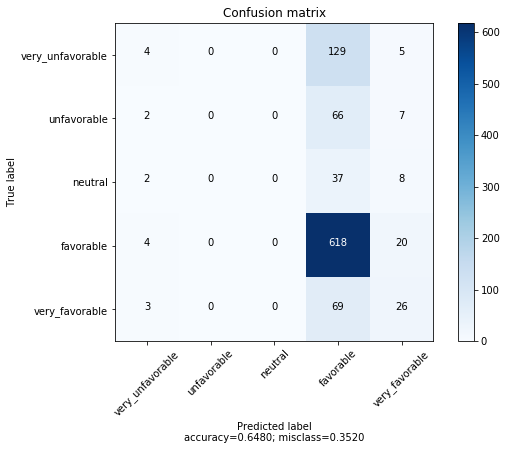

In [108]:
plot_confusion_matrix(cm = confusion, normalize = False, target_names =['very_unfavorable', 'unfavorable', 'neutral', 'favorable', 'very_favorable'],title = "Confusion matrix" )

The accuracy of this model is dependent on your positive words, negative words and negator words. And some reviewer like to write both postive and negative parts in their review. So it is so complicate to classify those reviews to which classes

## Problem 3

We are using TensorFlow to solve this problem.

 Apply TensorFlow and create a version of the neural network to solve the XOR problem

In [109]:
import tensorflow as tf

 Set up for Network 

In [110]:
# set up placeholder
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")

In [111]:
Weight1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="Weight1")
Weight2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="Weight2")

In [112]:
Bias1 = tf.Variable(tf.zeros([2]), name="Bias1")
Bias2 = tf.Variable(tf.zeros([1]), name="Bias2")

In [113]:
A = tf.sigmoid(tf.matmul(x_, Weight1) + Bias1)
Hypothesis = tf.sigmoid(tf.matmul(A, Weight2) + Bias2) # matmul is TensorFlow’s matrix multiplication function

Cost function is the average over all the training examples

In [114]:
cost = tf.reduce_mean(((y_ * tf.log(Hypothesis)) + ((1 - y_) * tf.log(1.0 - Hypothesis))) * -1)

Apply Gradient Descent Optimizer, learning rate = 0.01, minimize the cost funcetion

In [115]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

Initialization

In [116]:
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Run 100000 epochs

In [117]:
for i in range(100000):
        sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
        if i % 1000 == 0 or i == 99999:
            print('Epoch ', i)
            print('Hypothesis ', sess.run(Hypothesis, feed_dict={x_: XOR_X, y_: XOR_Y}))
            print('Weight1 ', sess.run(Weight1))
            print('Bias1 ', sess.run(Bias1))
            print('Weight2 ', sess.run(Weight2))
            print('Bias2 ', sess.run(Bias2))
            print('cost ', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
            print('---------------------------------------')

Epoch  0
Hypothesis  [[0.5166506 ]
 [0.49394938]
 [0.50145453]
 [0.4861751 ]]
Weight1  [[-0.50375724 -0.73375237]
 [-0.41613722 -0.8164424 ]]
Bias1  [-1.7908551e-05  3.7039696e-05]
Weight2  [[-0.71548593]
 [ 0.8487091 ]]
Bias2  [4.4320523e-06]
cost  0.69711316
---------------------------------------
Epoch  1000
Hypothesis  [[0.5101263 ]
 [0.49529043]
 [0.5025575 ]
 [0.49169075]]
Weight1  [[-0.5373461  -0.6594721 ]
 [-0.45718268 -0.7454048 ]]
Bias1  [-0.0189606   0.03602508]
Weight2  [[-0.7366304]
 [ 0.7916768]]
Bias2  [0.00236654]
cost  0.6952323
---------------------------------------
Epoch  2000
Hypothesis  [[0.50445217]
 [0.49630484]
 [0.50330985]
 [0.49645653]]
Weight1  [[-0.5747319 -0.599892 ]
 [-0.5020938 -0.6884379]]
Bias1  [-0.04034008  0.06942891]
Weight2  [[-0.7603029]
 [ 0.7503788]]
Bias2  [0.00208522]
cost  0.6938227
---------------------------------------
Epoch  3000
Hypothesis  [[0.4993109 ]
 [0.49720088]
 [0.5039282 ]
 [0.50076765]]
Weight1  [[-0.6173104  -0.55197906]
 [

Epoch  29000
Hypothesis  [[0.13682383]
 [0.7214509 ]
 [0.7235983 ]
 [0.4790506 ]]
Weight1  [[-4.3574    -1.6946243]
 [-4.3708787 -1.7124852]]
Bias1  [1.0924553 2.2018325]
Weight2  [[-5.154082]
 [ 3.13347 ]]
Bias2  [-0.8037426]
cost  0.36231217
---------------------------------------
Epoch  30000
Hypothesis  [[0.12953185]
 [0.7419087 ]
 [0.74332416]
 [0.44885847]]
Weight1  [[-4.476634  -1.8543236]
 [-4.4894314 -1.8667992]]
Bias1  [1.174271  2.4643252]
Weight2  [[-5.3584075]
 [ 3.4158256]]
Bias2  [-0.9597644]
cost  0.33240998
---------------------------------------
Epoch  31000
Hypothesis  [[0.12235603]
 [0.76250046]
 [0.763374  ]
 [0.41646534]]
Weight1  [[-4.587846  -2.0154006]
 [-4.5998554 -2.0239952]]
Bias1  [1.2537432 2.7271492]
Weight2  [[-5.5586143]
 [ 3.7017431]]
Bias2  [-1.1204903]
cost  0.3025813
---------------------------------------
Epoch  32000
Hypothesis  [[0.11527614]
 [0.7826658 ]
 [0.78317356]
 [0.38319334]]
Weight1  [[-4.6911173 -2.1742473]
 [-4.702305  -2.1802018]]
Bia

Epoch  58000
Hypothesis  [[0.0306029 ]
 [0.9616698 ]
 [0.96165866]
 [0.06254108]]
Weight1  [[-5.8711348 -4.120604 ]
 [-5.8747487 -4.1211753]]
Bias1  [2.2516105 6.0747466]
Weight2  [[-8.703337 ]
 [ 7.9621916]]
Bias2  [-3.5248115]
cost  0.04346077
---------------------------------------
Epoch  59000
Hypothesis  [[0.02961297]
 [0.96309835]
 [0.96308744]
 [0.06007903]]
Weight1  [[-5.891862  -4.1517525]
 [-5.895427  -4.152312 ]]
Bias1  [2.2664244 6.1234756]
Weight2  [[-8.766598]
 [ 8.036372]]
Bias2  [-3.5652425]
cost  0.041807648
---------------------------------------
Epoch  60000
Hypothesis  [[0.02867918]
 [0.9644283 ]
 [0.9644181 ]
 [0.05778649]]
Weight1  [[-5.911845  -4.1816964]
 [-5.915312  -4.182246 ]]
Bias1  [2.28066  6.170252]
Weight2  [[-8.827997]
 [ 8.107967]]
Bias2  [-3.604225]
cost  0.04026799
---------------------------------------
Epoch  61000
Hypothesis  [[0.02780142]
 [0.9656752 ]
 [0.9656654 ]
 [0.05565375]]
Weight1  [[-5.9311566 -4.210446 ]
 [-5.934574  -4.210985 ]]
Bias1 

Epoch  87000
Hypothesis  [[0.01524812]
 [0.9823912 ]
 [0.9823873 ]
 [0.02764074]]
Weight1  [[-6.2825007 -4.7129207]
 [-6.2848797 -4.7133136]]
Bias1  [2.5310795 6.99571  ]
Weight2  [[-10.024242]
 [  9.450379]]
Bias2  [-4.3242903]
cost  0.019732717
---------------------------------------
Epoch  88000
Hypothesis  [[0.01498138]
 [0.9827247 ]
 [0.98272103]
 [0.02709991]]
Weight1  [[-6.292259 -4.726277]
 [-6.294578 -4.726665]]
Bias1  [2.5373435 7.0164795]
Weight2  [[-10.05734 ]
 [  9.486313]]
Bias2  [-4.3433404]
cost  0.019356214
---------------------------------------
Epoch  89000
Hypothesis  [[0.01472595]
 [0.98304635]
 [0.9830428 ]
 [0.02657685]]
Weight1  [[-6.301796  -4.7395096]
 [-6.304115  -4.7398915]]
Bias1  [2.5435424 7.0368557]
Weight2  [[-10.089765]
 [  9.521599]]
Bias2  [-4.361937]
cost  0.018993374
---------------------------------------
Epoch  90000
Hypothesis  [[0.01447694]
 [0.983356  ]
 [0.9833524 ]
 [0.02607476]]
Weight1  [[-6.3113327 -4.752384 ]
 [-6.3136516 -4.752766 ]]
Bi

  We use Tensorflow to build a nerual network which include  input layer, 2 hidden layers,output layer. The first hidden layer has a 2 x 2 weight, and 1 x 2 bias,the second hidden layer has a 2 x 1 weight, and 1 x 1 bias. Cost function is the average over all the training examples. Apply Gradient Descent Optimizer( learning rate = 0.01), minimize the cost funcetion. After initialization, we run100000 epochs and print details after every 1000 epoches.  

 The final result shows 

 The parameter of layer 1:
 Weight1: [[7.305272  5.379917], [7.363968  5.390392]]

 Bias1: [-3.3439112  -8.241363 ]

 The parameter of layer 2:
 Weight2:  [[ 12.218492], [-13.051365]]
 Bias2  [-5.6847696]

 Cost is 0.004087941, which shows a good result

## Problem 4

We are using the corpus 'brown' from nltk to be our dictionary to train our model.

In [118]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import gensim, logging, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import nltk
#the corpus is brown from nltk
corpus = nltk.corpus.brown.sents()
 
name = 'brown_skipgram.model'
if os.path.exists(name):
    # load the file if it has already been trained, to save repeating the slow training step below
    model = gensim.models.Word2Vec.load(name)
else:
    # can take a few minutes, grab a cuppa
    model = gensim.models.Word2Vec(corpus, size=100, min_count=5, workers=2, iter=50) 
    model.save(name)

2018-10-28 21:19:51,112 : INFO : loading Word2Vec object from brown_skipgram.model
2018-10-28 21:19:51,194 : INFO : loading wv recursively from brown_skipgram.model.wv.* with mmap=None
2018-10-28 21:19:51,195 : INFO : setting ignored attribute vectors_norm to None
2018-10-28 21:19:51,195 : INFO : loading vocabulary recursively from brown_skipgram.model.vocabulary.* with mmap=None
2018-10-28 21:19:51,195 : INFO : loading trainables recursively from brown_skipgram.model.trainables.* with mmap=None
2018-10-28 21:19:51,196 : INFO : setting ignored attribute cum_table to None
2018-10-28 21:19:51,196 : INFO : loaded brown_skipgram.model


Evaluate model by calculating similarity between words:

In [119]:
words = "orange bear apple pear green blue man".split()
for w1 in words:
    for w2 in words:
        print(w1, w2, model.similarity(w1, w2))

orange orange 1.0
orange bear -0.0017590821
orange apple 0.22567828
orange pear 0.42189074
orange green 0.5011802
orange blue 0.6291137
orange man -0.021285273
bear orange -0.0017590821
bear bear 1.0
bear apple -0.1374419
bear pear 0.0026411507
bear green 0.13241322
bear blue 0.045215566
bear man 0.056070715
apple orange 0.22567828
apple bear -0.1374419
apple apple 1.0
apple pear 0.24558729
apple green 0.3519611
apple blue 0.25530028
apple man 0.08215596
pear orange 0.42189074
pear bear 0.0026411507
pear apple 0.24558729
pear pear 1.0
pear green 0.4168207
pear blue 0.4186491
pear man 0.06445552
green orange 0.5011802
green bear 0.13241322
green apple 0.3519611
green pear 0.4168207
green green 1.0
green blue 0.58028716
green man 0.087563396
blue orange 0.6291137
blue bear 0.045215566
blue apple 0.25530028
blue pear 0.4186491
blue green 0.58028716
blue blue 1.0
blue man 0.061722886
man orange -0.021285273
man bear 0.056070715
man apple 0.08215596
man pear 0.06445552
man green 0.087563396

C:\Users\kexu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\kexu\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Plot confusion matrix 

In [120]:
import numpy as np
import matplotlib.pyplot as plt
#let M be confusion matrix
M = np.zeros((len(words), len(words)))
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        M[i,j] = model.similarity(w1, w2)
        M[i,j] = round(M[i,j], 4)

C:\Users\kexu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
C:\Users\kexu\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


plot confusion matrix 

In [121]:
import seaborn as sn
import pandas as pd
import numpy as np


def plot_confusion_matrix_1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.show()

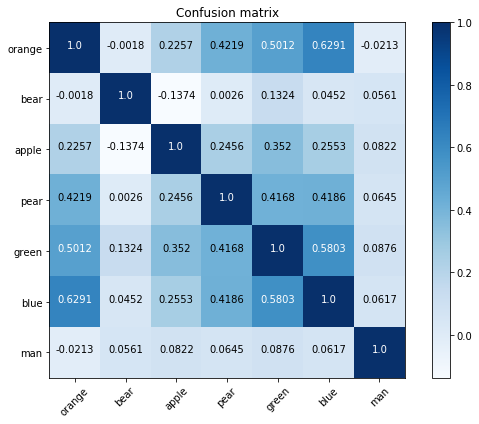

In [122]:
plot_confusion_matrix_1(cm = M, normalize = False, target_names =words,title = "Confusion matrix" )

The accuracy is dependent on your dictionary, if you have good dictionary the accuracy will be high and you will have better model.

In [123]:
print('confusion matrix:')
print(M)

confusion matrix:
[[ 1.     -0.0018  0.2257  0.4219  0.5012  0.6291 -0.0213]
 [-0.0018  1.     -0.1374  0.0026  0.1324  0.0452  0.0561]
 [ 0.2257 -0.1374  1.      0.2456  0.352   0.2553  0.0822]
 [ 0.4219  0.0026  0.2456  1.      0.4168  0.4186  0.0645]
 [ 0.5012  0.1324  0.352   0.4168  1.      0.5803  0.0876]
 [ 0.6291  0.0452  0.2553  0.4186  0.5803  1.      0.0617]
 [-0.0213  0.0561  0.0822  0.0645  0.0876  0.0617  1.    ]]
